In [1]:
import pandas as pd
import numpy as np

from scipy import stats

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [3]:
audience_graph = pd.read_json('data/audience-graph.json', lines=True)
audience_graph = audience_graph.rename(columns={'kt_scaled': 'audience_sim'})
audience_graph = audience_graph[['d1', 'd2', 'audience_sim']]

In [4]:
headline_graph = pd.read_json('data/headline-graph.json', lines=True)
headline_graph = headline_graph.rename(columns={'d1s': 'd1', 'd2s': 'd2', 'score': 'content_sim'})
headline_graph['content_sim'] = -headline_graph['content_sim']
headline_graph = headline_graph[['d1', 'd2', 'content_sim']]

In [5]:
ac = audience_graph.merge(headline_graph, on=['d1', 'd2'], suffixes=('_audience', '_content'))
ac['pair'] = ac[['d1', 'd2']].apply(lambda x: f'{x[0]} - {x[1]}', 1)

In [6]:
points = (alt
     .Chart(ac)
     .mark_circle(size=50)
     .encode(x='audience_sim', y='content_sim', tooltip='pair'))

In [7]:
xfit = np.linspace(ac.audience_sim.min(), ac.audience_sim.max())
yfit = np.poly1d(np.polyfit(ac.audience_sim, ac.content_sim, 1))(xfit)
fit_df = pd.DataFrame(list(zip(xfit, yfit)), columns=('x', 'y'))

In [8]:
fit = (alt
    .Chart(fit_df, width=500, height=500)
    .mark_line()
    .encode(
        x=alt.X('x', scale=alt.Scale(domain=[-4, 4])),
        y=alt.Y('y', scale=alt.Scale(domain=[-4, 4])),
    ))

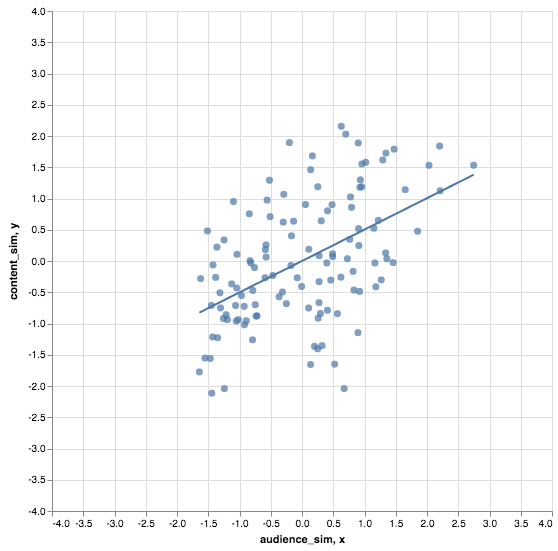

In [9]:
points + fit

In [10]:
ac['sim_delta'] = ac.content_sim - ac.audience_sim

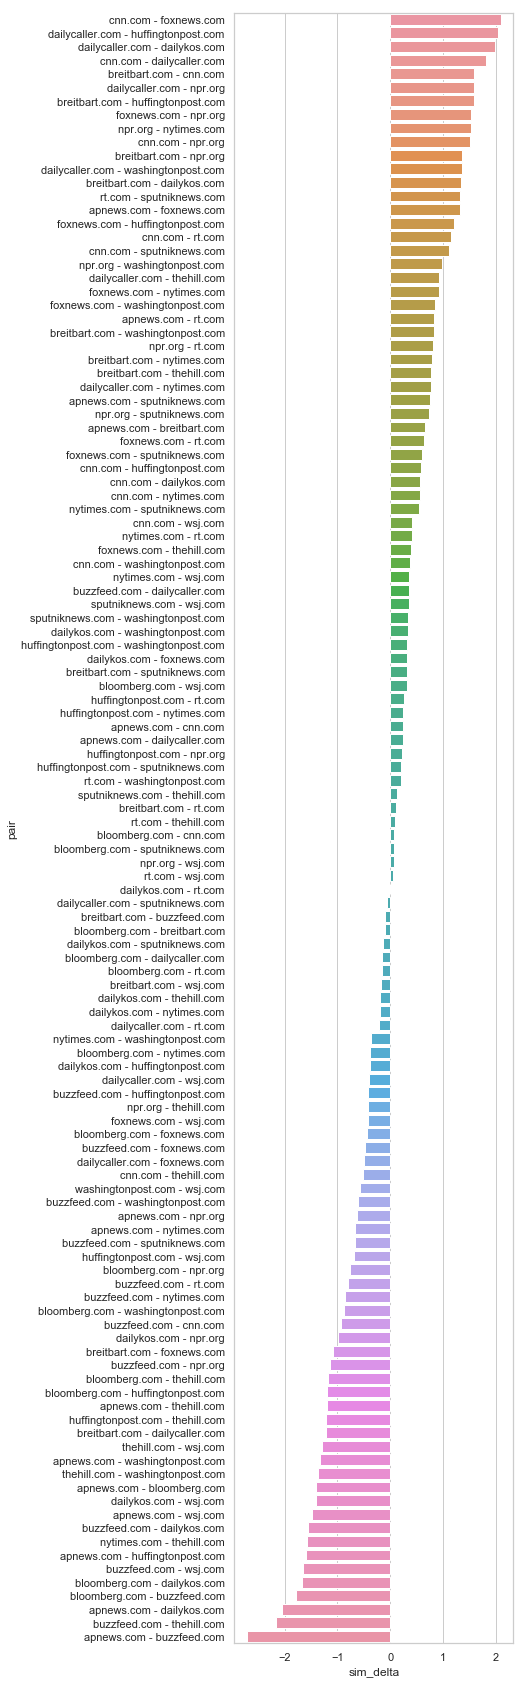

In [11]:
plt.figure(figsize=(5,30))
sns.barplot(x='sim_delta', y='pair', data=ac.sort_values('sim_delta', ascending=False))